In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

In [51]:
import pandas 

# collect all our data sets 

tm = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 )[ [ 'expression' ] ]

bench = pandas.read_csv( '../data_sets/features/benchmark_feature_set.csv' )
bench = bench.groupby( 'description' ).apply( lambda x: x.sort_values( 'total_score' ).head( 10 ).mean() ) 

foldx = pandas.read_csv( '../data_sets/features/foldx.csv', index_col=0 )

ddg = pandas.read_csv( '../data_sets/features/ddg_feature_set.csv', index_col=0 )

relax = pandas.read_csv( '../data_sets/features/fast_relax.csv' )
relax = relax.groupby( 'name' ).apply( lambda x: x.sort_values( 'total_score' ).head( 10 ).mean() ) 

In [52]:
print tm.expression.value_counts()
print 37./92

1    92
0    37
Name: expression, dtype: int64
0.402173913043


In [53]:
feature_sets = [ 
    ( 'RosettaDesign', bench ),
    ( 'FoldX', foldx ), 
    ( 'Rosetta ddG', ddg ), 
    ( 'Rosetta FastRelax', relax ), 
]

In [54]:
# how many features? 

for name, feature_set in feature_sets:
    feature_set = tm.join( feature_set ).dropna()
    print '{1}\t{0}'.format( name, len( feature_set.columns ) ) 

60	RosettaDesign
23	FoldX
15	Rosetta ddG
20	Rosetta FastRelax


In [37]:
# tables of single feature correlations for Tm 

for name, feature_set in feature_sets:
    feature_set = tm.join( feature_set ).dropna()
    print name, 'single feature correlations (SRC)' 
    print feature_set.corr( method='spearman' )[ 'expression' ].drop( 'expression' ).dropna().sort_values( ascending=False )

RosettaDesign single feature correlations (SRC)
tot_NLconts_pm           0.281941
SR_5_hbond_pm            0.221328
SR_4_burunsat_pm         0.207740
tot_nlsurfaceE_pm        0.136617
SR_4_hbond_sc            0.131229
SR_4_total_score         0.111878
SR_4_nlpstat_pm          0.099889
SR_3_total_score         0.094497
SR_1_total_score         0.094497
tot_total_charge         0.093698
SR_2_hbond_pm            0.091231
SR_4_pstat_pm            0.069283
SR_1_all_cst             0.047756
SR_3_all_cst             0.047756
tot_hbond_pm             0.030123
SR_3_hbond_pm            0.027482
SR_1_hbond_pm            0.027482
SR_4_hbond_pm            0.026304
SR_5_dsasa_1_2           0.019684
SR_4_fa_rep              0.015914
SR_5_fa_rep              0.015179
SR_3_pstat_pm            0.012241
SR_1_pstat_pm            0.012241
SR_5_all_cst             0.001470
SR_2_fa_rep              0.000734
SR_3_fa_rep             -0.004407
SR_1_fa_rep             -0.004407
tot_total_pos_charges   -0.013812


RosettaDesign single feature correlations


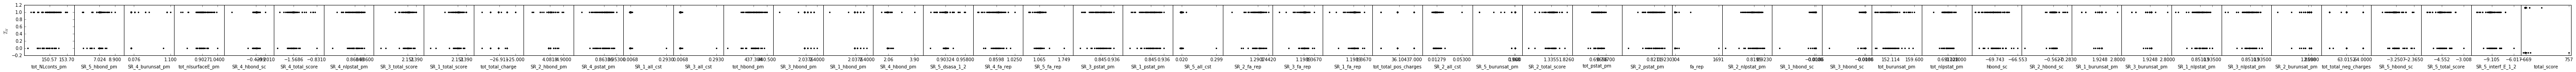

FoldX single feature correlations


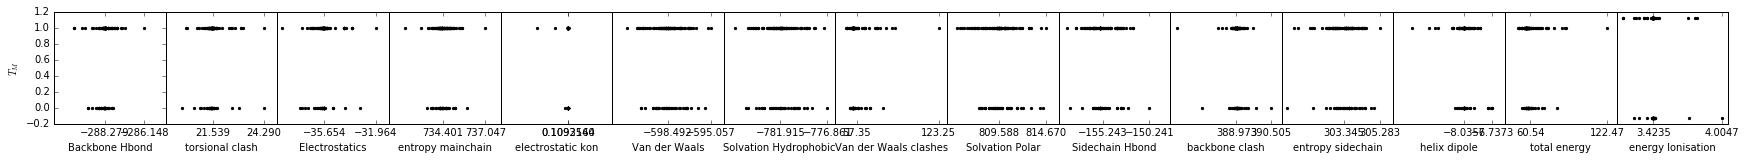

Rosetta ddG single feature correlations


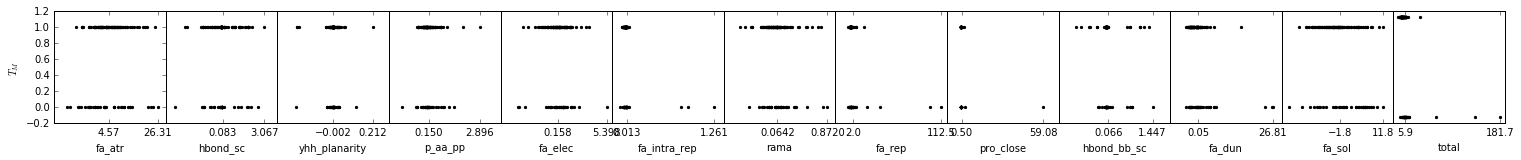

Rosetta FastRelax single feature correlations


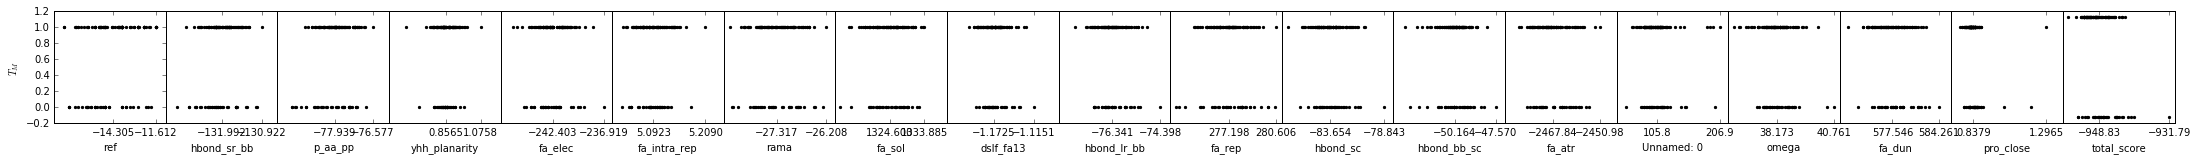

In [38]:
# would be nice to have plots, too

# tables of single feature correlations for Tm 

for name, feature_set in feature_sets:
    feature_set = tm.join( feature_set ).dropna()
    print name, 'single feature correlations' 
    my_corr = feature_set.corr( method='spearman' )[ 'expression' ].drop( 'expression' ).dropna().sort_values( ascending=False )
    
    n_feats = len( my_corr ) 
    scale_factor = 2 
    plt.figure(figsize=( scale_factor * n_feats, scale_factor ) )
    
    for i, ( feat, value ) in enumerate( my_corr.iteritems() ):
        plt.subplot( 1, n_feats, i+1 )
        plt.scatter( feature_set[ feat ], feature_set.expression, marker='.', c='k' ) 
        plt.xlabel( feat ) 
        
        plt.xticks( ( feature_set[ feat ].mean(), feature_set[ feat ].max() ) )
        #print feat, value 
        if i == 0:
            plt.ylabel( '$T_M$' ) 
        else:
            plt.yticks( [] )
            
        
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.locator_params(nbins=2)
    
    plt.show()

RosettaDesign


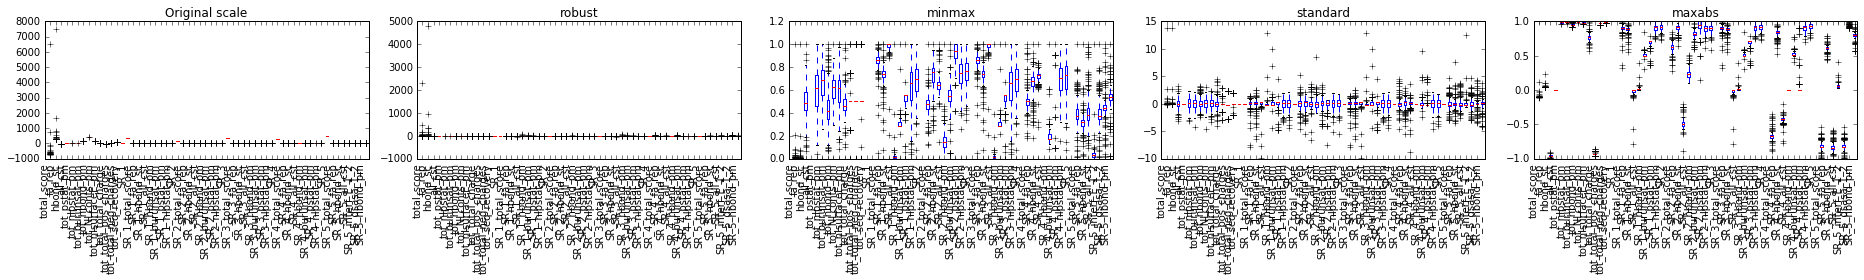

FoldX


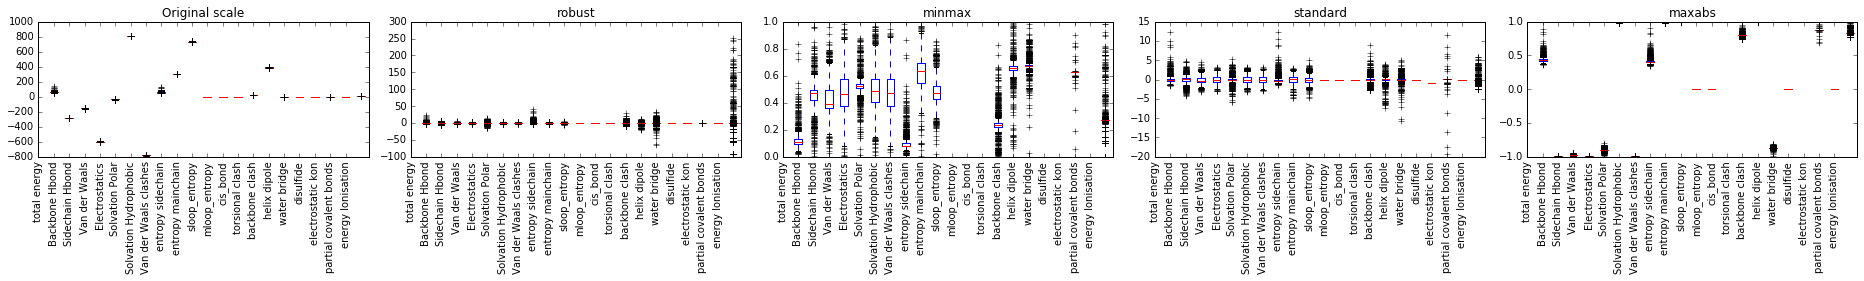

Rosetta ddG


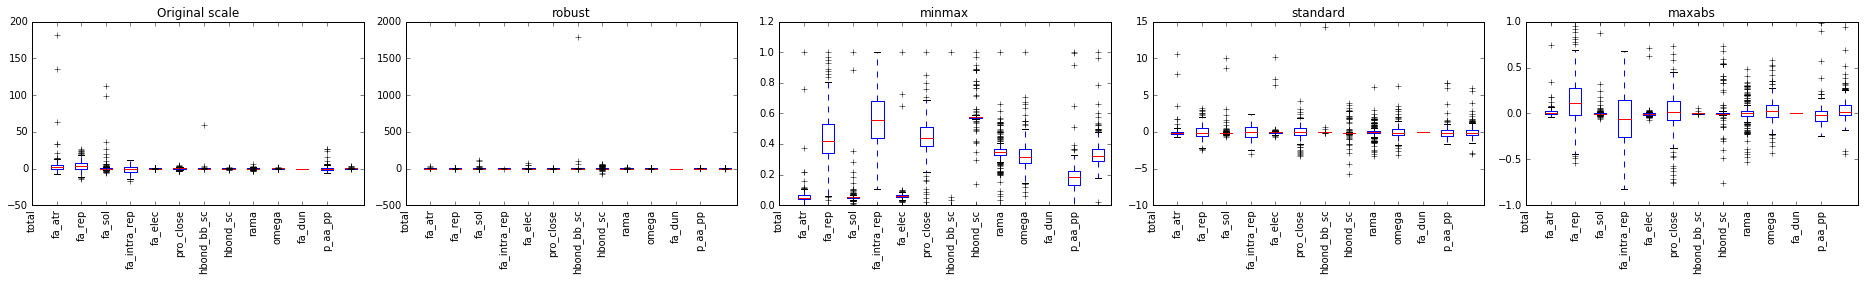

Rosetta FastRelax


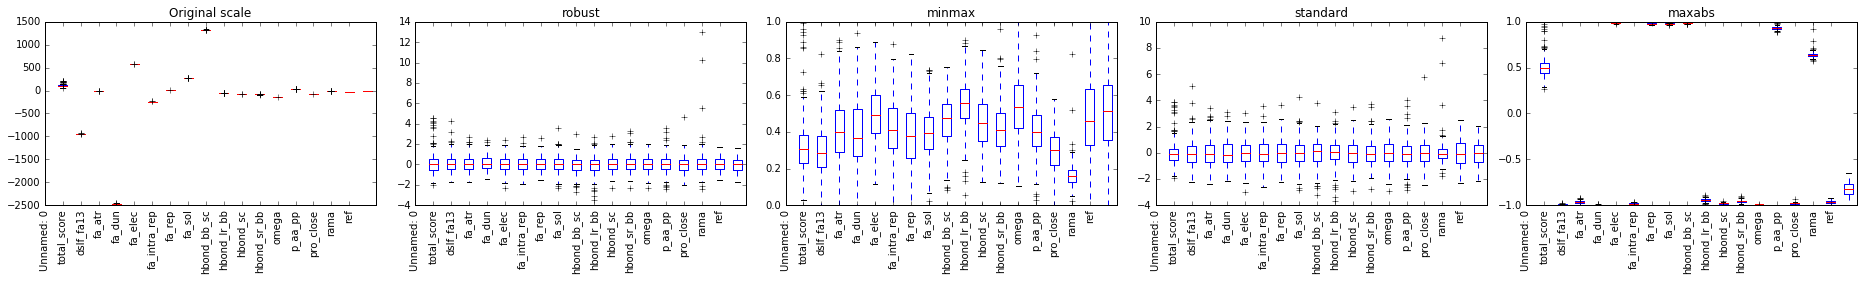

In [39]:
# investigate different scaling methods 

from sklearn import preprocessing

scalers = [ 
    ( 'robust', preprocessing.RobustScaler() ), 
    ( 'minmax', preprocessing.MinMaxScaler() ), 
    ( 'standard', preprocessing.StandardScaler() ), 
    ( 'maxabs', preprocessing.MaxAbsScaler() ), 
]

for name, feature_set in feature_sets:
    
    print name 

    plt.figure( figsize=(26, 4) )
    plt.subplot( 1, len( scalers )+1, 1 )
    plt.title( 'Original scale' ) 
    plt.boxplot( feature_set.ix[:,:-1].as_matrix() )
    plt.xticks( range( len( feature_set.columns[:-1] ) ), feature_set.columns[:-1], rotation=90 ) 
    for i, ( scaler_name, scaler ) in enumerate( scalers ):
        plt.subplot( 1, len( scalers ) + 1, i + 2 )
        plt.title( scaler_name ) 
        plt.boxplot( scaler.fit_transform( feature_set.ix[:,:-1] ) )
        plt.xticks( range( len( feature_set.columns[:-1] ) ), feature_set.columns[:-1], rotation=90 ) 
    plt.tight_layout()   
    plt.show()

RosettaDesign
             precision    recall  f1-score   support

          0       0.35      0.31      0.33        36
          1       0.73      0.78      0.75        89

avg / total       0.62      0.64      0.63       125



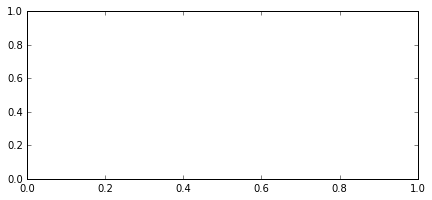

FoldX
             precision    recall  f1-score   support

          0       0.43      0.32      0.37        37
          1       0.75      0.82      0.78        90

avg / total       0.65      0.68      0.66       127



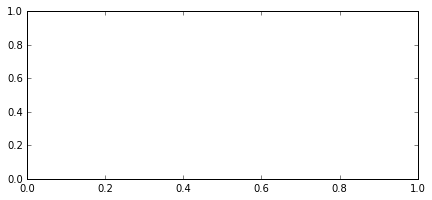

Rosetta ddG
             precision    recall  f1-score   support

          0       0.47      0.49      0.48        37
          1       0.79      0.78      0.78        90

avg / total       0.70      0.69      0.69       127



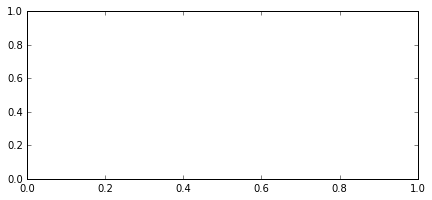

Rosetta FastRelax
             precision    recall  f1-score   support

          0       0.39      0.30      0.34        37
          1       0.73      0.81      0.77        89

avg / total       0.63      0.66      0.64       126



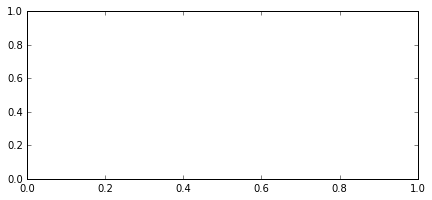

In [40]:
# now, let's train random forest models for each feature set 

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, cross_val_predict
from sklearn.metrics import classification_report
import numpy as np 

for name, feature_set in feature_sets:
    feature_set = tm.join( feature_set ).dropna()
    scl = preprocessing.StandardScaler()
    X = scl.fit_transform( feature_set.ix[ : , 1: ] )
    y = feature_set.ix[ : , 0 ]
    
    print name 
    
    #clf = RandomForestClassifier( class_weight='balanced_subsample' )
    clf = RandomForestClassifier()
    preds = cross_val_predict( clf, X, y, cv=10 ) 
    
    print classification_report( y, preds ) 

    plt.figure( figsize=(7, 3) )
    plt.subplot( 1, 1, 1 )
    #plt.scatter( y, preds, c='k', lw=0 )
#         plt.xlabel( 'Measured Tm' ) 
#         plt.ylabel( 'Predicted Tm' )
#     plt.title( u'Linear regression\nscore={}±{}'.format( np.mean( scores ).round(2), np.std( scores ).round(2) ) )
    
#     scores = []
#     plt.subplot( 1, 2, 2 )
#     for train, test in skf:
#         net = ElasticNetCV()
#         net.fit( X[ train ], y[ train ] ) 
#         scores.append( reg.score( X[ test ], y[ test ] ) )
#         preds = net.predict( X[ test ] )
        
#         plt.scatter( y[ test ], preds, c='k', lw=0 )

#         plt.xlabel( 'Measured Tm' ) 
#     plt.title( u'Elastic net\nscore={}±{}'.format( np.mean( scores ).round(2), np.std( scores ).round(2) ) )
    plt.show()

In [41]:
# try to do

# feature selection start with 1, keep adding until performance stops increasing 
# plot a learning curve 
# exclude the best one at each stage 
# forward backward 

RosettaDesign


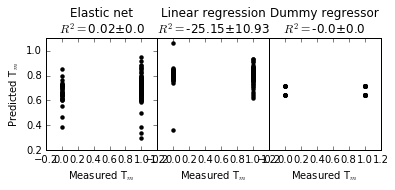

FoldX


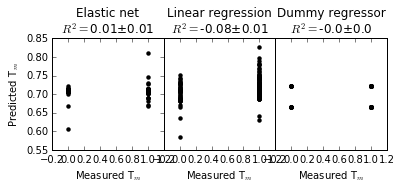

Rosetta ddG


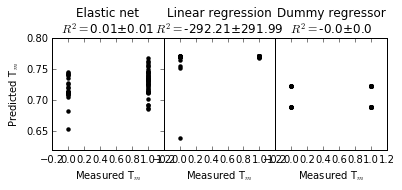

Rosetta FastRelax


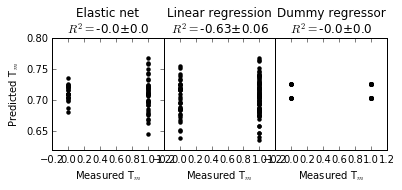

In [42]:
# now, let's train linear and elastic net models for each feature set 

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, ElasticNetCV, RANSACRegressor
from sklearn.cross_validation import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.dummy import DummyRegressor

classifiers = [ 
    ( 'Elastic net', ElasticNetCV() ), 
    ( 'Linear regression', LinearRegression(fit_intercept=True) ), 
    #( 'RANSAC with linear model', RANSACRegressor( LinearRegression() ) ), 
    ( 'Dummy regressor', DummyRegressor() ), 
] 

for name, feature_set in feature_sets:
    
    feature_set = tm.join( feature_set ).dropna()
    scl = StandardScaler()
    X = scl.fit_transform( feature_set.ix[ : , 1: ] )
    y = feature_set.ix[ : , 0 ]
    skf = StratifiedKFold( y, n_folds=2, shuffle=False, random_state=3 ) 
    
    print name 
    
    n_clf = len( classifiers ) 
    scl_factor = 2 
    plt.figure( figsize=(n_clf * scl_factor, scl_factor) )

    for idx, ( name, clf ) in enumerate( classifiers ):
        plt.subplot( 1, n_clf, idx+1 )
        preds = cross_val_predict( clf, X, y, cv=skf )
        scores = cross_val_score( clf, X, y, cv=skf, scoring='r2' )
        plt.scatter( y, preds, lw=0, c='k' ) 
        plt.title( u'{}\n$R^2=${}±{}'.format( name, scores.mean().round(2), scores.std().round(2) ) ) 
        #plt.xticks( [ 34, 38, 42 ] )
        plt.xlabel( 'Measured T$_m$' )
        #plt.xlim( [ 30, 46 ] ) 
        #plt.ylim( [ 30, 46 ] ) 
        
        if idx != 0:
            plt.yticks([]) 
        else:
            plt.ylabel( 'Predicted T$_m$' )
            #plt.yticks( [ 34, 38, 42 ] ) 
            
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [60]:
TSNE?

In [59]:
from sklearn.manifold import TSNE

for name, feature_set in feature_sets:
    feature_set = tm.join( feature_set ).dropna()
    model = TSNE(n_components=2)
    n = model.fit_transform(feature_set) 
    
    #plt.scatter( zip( * n ) )
    #plt.show()

ValueError: array must not contain infs or NaNs

In [61]:
import random
from sklearn.manifold import TSNE
random.seed(1)
a = np.random.uniform(size=(100,20))
TSNE(n_components=2).fit_transform(a)

ValueError: array must not contain infs or NaNs

RosettaDesign


KeyboardInterrupt: 

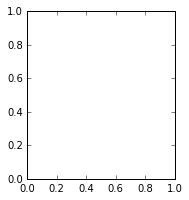

In [43]:
# permutation tests  

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, ElasticNetCV, RANSACRegressor
from sklearn.cross_validation import StratifiedKFold, cross_val_predict, cross_val_score, permutation_test_score
from sklearn.dummy import DummyRegressor

classifiers = [ 
    ( 'Elastic net', ElasticNetCV() ), 
    ( 'Linear regression', LinearRegression() ), 
    ( 'Dummy regressor', DummyRegressor() ), 
] 

for name, feature_set in feature_sets:
    
    feature_set = tm.join( feature_set ).dropna()
    scl = StandardScaler()
    X = scl.fit_transform( feature_set.ix[ : , 1: ] )
    y = feature_set.ix[ : , 0 ]
    skf = StratifiedKFold( y, n_folds=2, shuffle=False, random_state=3 ) 
    
    print name 
    
    n_clf = len( classifiers ) 
    scl_factor = 3 
    plt.figure( figsize=(n_clf * scl_factor, scl_factor) )

    for idx, ( name, clf ) in enumerate( classifiers ):
        plt.subplot( 1, n_clf, idx+1 )
        mean_score, scores, p_value = permutation_test_score( clf, X, y, scoring='r2', n_permutations=100 )
        
        plt.hist( scores, color='k' ) 
        plt.title( '{}\nmean={}, p={}'.format( name, mean_score.round( 2 ), p_value.round( 2 ) ) )
        plt.xticks( rotation=90 ) 
            
    #plt.subplots_adjust(wspace=0, hspace=0)

    plt.show()

In [ ]:
# fit model to all features 
# score 
# remove best feature 
# score 
# repeat until 1 feature left 
# plot scores against features 

In [ ]:
# now, let's train random forest models for each feature set 

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
import numpy as np 

for name, feature_set in feature_sets:
    feature_set = tm.join( feature_set ).dropna()
    scl = preprocessing.StandardScaler()
    X = scl.fit_transform( feature_set.ix[ : , 1: ] )
    y = feature_set.ix[ : , 0 ]
    
    print name 
    
    plt.figure( figsize=(7, 3) )
    plt.subplot( 1, 1, 1 )
    
    for iii in range( len( feature_set.columns ) - 1 ):
        
        pln = Pipeline([ 
            ( 'select', SelectKBest(k=iii+1) ),
            ( 'clf', RandomForestClassifier(class_weight='balanced') ), 
        ])
        
        preds = cross_val_score( pln, X, y, cv=10, scoring='f1' ) 
        plt.scatter( [iii]*len(preds), preds, lw=0, c='k' ) 
        plt.xlabel( 'Number of features') 
        plt.ylabel( 'F1 score' )
    plt.show()